In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

# Data Conversion to numerical categorical values

In [35]:
def convertCategorical(column):
    map_convert = get_mapping(column)
    keys.append(map_convert)
    
    for i in range(len(data[column])):
        data[column][i] = convert(data[column][i], map_convert)

In [36]:
def get_mapping(column):
    map_convert = {}
    unique_values = data[column].tolist()
    unique_values = set(unique_values)
    unique_values = list(unique_values)
    count = 0
    
    for value in unique_values:
        map_convert[value] = count
        count += 1
        
    return map_convert

In [37]:
def convert(value, map):
    return map[value]

In [95]:
global keys
keys = list()
global data
data = pd.read_csv("StudentData.txt")

for column in data.columns:
    convertCategorical(column)

X = data.drop("G3", axis=1)
y = np.array(data.pop("G3")).astype(float)

sum = 0
for i in range(len(y)):
    sum += y[i]

avg = sum/len(y)

for i in range(len(y)):
    if y[i] > avg:
        y[i] = 1
    else:
        y[i] = 0
        
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test = np.array(y_test).astype(int)

<ipython-input-35-8f49808738ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = convert(data[column][i], map_convert)


# Random Forest experimentation

In [69]:
for i in range(1,11):
    for j in range(1,11):
        rf = RandomForestClassifier(max_features=i, max_depth=j, random_state=0)
        rf.fit(X_train,y_train)
        yhat = rf.predict(X_test)
        correct = 0;
        for h in range(len(yhat)):
            if y_test[h] == yhat[h]:
                correct += 1

        print(correct/len(yhat))
    print(",")


0.7974683544303798
0.9240506329113924
0.9367088607594937
0.9240506329113924
0.9240506329113924
0.9240506329113924
0.9113924050632911
0.9620253164556962
0.9367088607594937
0.9240506329113924
,
0.9240506329113924
0.9240506329113924
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9620253164556962
0.9367088607594937
0.9493670886075949
0.9367088607594937
,
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9493670886075949
0.9493670886075949
,
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
,
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9493670886075949
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
,
0.9620253164556962
0.9620253164556962
0.

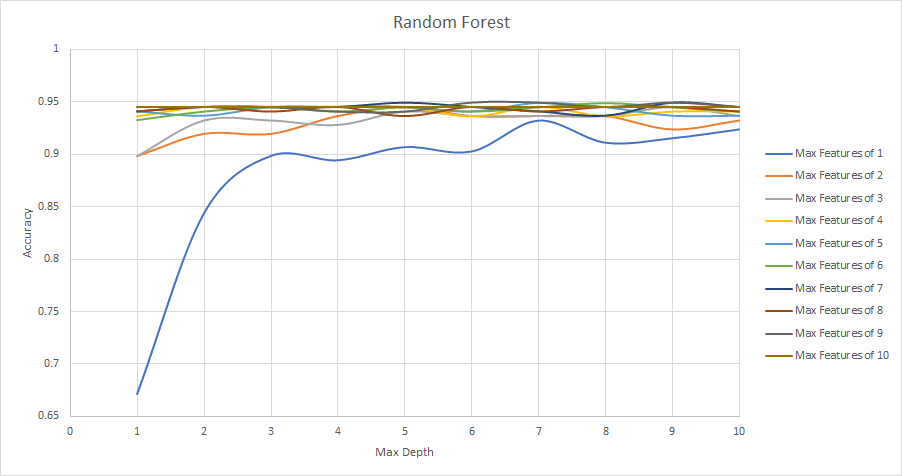

baseline: 0.9494

# Decision Tree experimentation

In [79]:
for i in range(1,11):
    for j in range(1,11):
        dt = DecisionTreeClassifier(max_features = i, max_depth = j,random_state=0)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_test)
        correct = 0;
        for h in range(len(yhat)):
            if y_test[h] == yhat[h]:
                correct += 1

        print(correct/len(yhat))
    print(",")

0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
0.

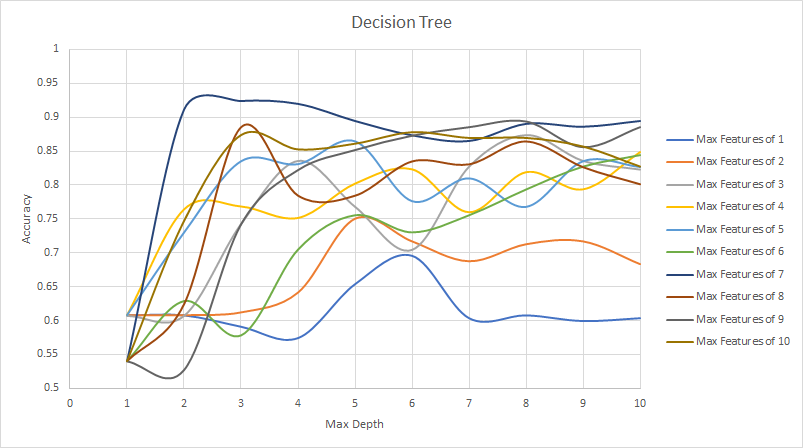

baseline: 0.8903

# Support Vector Machine experimentation

In [88]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    for j in range(1,11):
        svc = svm.SVC(kernel = kernels[i],C = j*.2)
        svc.fit(X_train, y_train)
        yhat = svc.predict(X_test)
        correct = 0;
        for h in range(len(yhat)):
            if y_test[h] == yhat[h]:
                correct += 1

        print(correct/len(yhat))
    print(",")

0.9367088607594937
0.9240506329113924
0.8987341772151899
0.9367088607594937
0.9367088607594937
0.9367088607594937
0.9113924050632911
0.9113924050632911
0.9240506329113924
0.9113924050632911
,
0.9367088607594937
0.9493670886075949
0.9620253164556962
0.9620253164556962
0.9493670886075949
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
0.9620253164556962
,
0.9367088607594937
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9493670886075949
0.9367088607594937
0.9367088607594937
0.9367088607594937
,
0.5443037974683544
0.4936708860759494
0.45569620253164556
0.45569620253164556
0.46835443037974683
0.46835443037974683
0.4810126582278481
0.46835443037974683
0.46835443037974683
0.46835443037974683
,


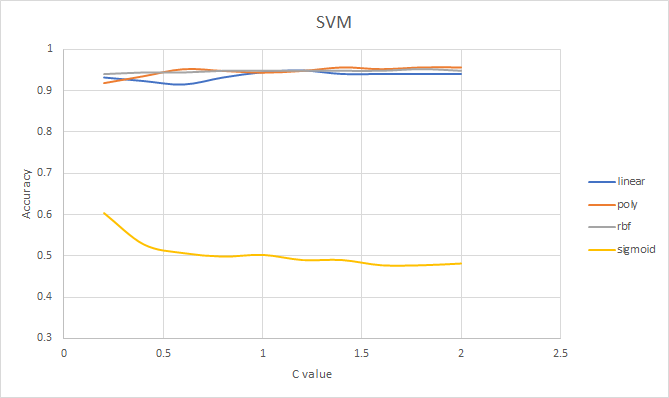

baseline: 0.9494

In [97]:
weights = ['uniform', 'distance']
for i in range(1,11):
    for j in range(2):
        neigh = KNeighborsClassifier(n_neighbors=i, weights=weights[j])
        neigh.fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        correct = 0;
        for h in range(len(yhat)):
            if y_test[h] == yhat[h]:
                correct += 1

        print(correct/len(yhat))
    print(",")

0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,
0.8860759493670886
0.8860759493670886
,


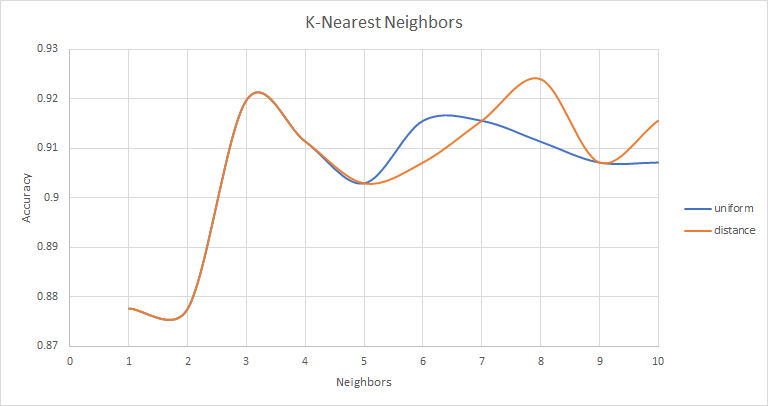

baseline: 0.903